## 다항회귀분석
피쳐들(독립변수)과 레이블(종속변수)이 2차 함수 이상의 관계를 가지는 것으로 곡선이나 좀 더 복잡한 모양을 표현하는 것이 가능

## 피쳐들(독립변수)의 차수를 높이는 형태
다항회귀 역시 선형회귀로 간주 되는데 선형회귀의 정의가 단순히 직선이나 곡선과 같은 모양에 있는 것이 아니라 가중치와 피쳐들의 선형 결합에 있기 때문

다항회귀는 별도의 알고리즘이 있는 것이 아니라 피쳐들을 제곱, 서로 곱한 값 등 좀 더 복잡한 값으로 만들어 선형회귀에 넣어서 학습시킴

sicikit-learn에서는 PolynomialFeatures 클래스로 원본 단항 Feature들을 다항 Feature들로 변환한 데이터 세트에 LinearRegression 객체를 적용하는 것으로 다항 회귀 기능 제공

In [19]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [20]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

### 02. 자동차의 속도(speed)에 따른 제동거리(dist) 예측
#### 데이터 가져오기

In [21]:
origin = read_excel("cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


#### 데이터 전처리
0차항(1)을 포함하는 2차식으로 변환
`PolynomialFeatures` 클래스를 $y = ax+b$ 라는 회귀식을 $ y = ax^2 +bx + c$ 형태로 바꾼다.

- degree : 변환할 차수 (기본값=2)
- include_bias : True인 경우 0차항(1)도 함께 생성한다. (기본값=True)

In [22]:
poly = PolynomialFeatures(degree = 2,include_bias=False)
fit = poly.fit_transform(origin[['speed']])
fit


array([[  4.,  16.],
       [  4.,  16.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 15., 225.],
       [ 15., 225.],
       [ 15., 225.],
       [ 16., 256.],
       [ 16., 256.],
       [ 17., 289.],
       [ 17., 289.],
       [ 17., 289.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 19., 361.],
       [ 19., 361.],
       [ 19., 361.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 24., 576.],
       [ 24.,

생성된 피처의 이름 확인

In [23]:
poly.get_feature_names_out()

array(['speed', 'speed^2'], dtype=object)

In [24]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()


,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


### 종속변수만 추출한 데이터 프레임

In [25]:
y = origin[['dist']]
y.head()


,dist
0,2
1,10
2,4
3,22
4,16


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 2), (15, 2), (35, 1), (15, 1))

In [27]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[-0.70821313  0.15776853]]
절편:  [13.77719866]
훈련 데이터 설명력:  0.6485400758235874
검증 데이터 설명력:  0.67604660165353


#### 회귀식 추정

In [28]:
fit.coef_[0]

array([-0.70821313,  0.15776853])

In [29]:
feature_names = x.columns

expr = []
for i , v in enumerate(feature_names):
    expr.append("%f x %s" % (fit.coef_[0][i], v))

expr = " +".join(expr)
expr = " y = " + expr + " + %f" % fit.intercept_[0]
expr

' y = -0.708213 x speed +0.157769 x speed^2 + 13.777199'

#### 예측값 생성

훈련 데이터에 대한 에측값

In [30]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred


array([38.65192042, 42.83453164, 57.27558763, 31.23330914, 22.47192014,
       87.65475538, 52.14636525, 52.14636525, 34.78484626, 34.78484626,
       27.99730909, 13.4686426 , 18.20867941, 27.99730909, 42.83453164,
       62.72034707, 34.78484626, 47.33267992, 25.07684608, 31.23330914,
       80.94784772, 87.65475538, 87.65475538, 27.99730909, 62.72034707,
       16.55036462, 52.14636525, 47.33267992, 25.07684608, 31.23330914,
       38.65192042, 62.72034707, 16.55036462, 38.65192042, 22.47192014])

검증 데이터에 대한 예측값

In [31]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)# 차원 줄여줌
y_test_pred


array([22.47192014, 57.27558763, 57.27558763, 47.33267992, 74.55647712,
       94.67720009, 20.18253124, 52.14636525, 34.78484626, 62.72034707,
       13.4686426 , 27.99730909, 31.23330914, 87.65475538, 62.72034707])

#### 학습 결과 시각화


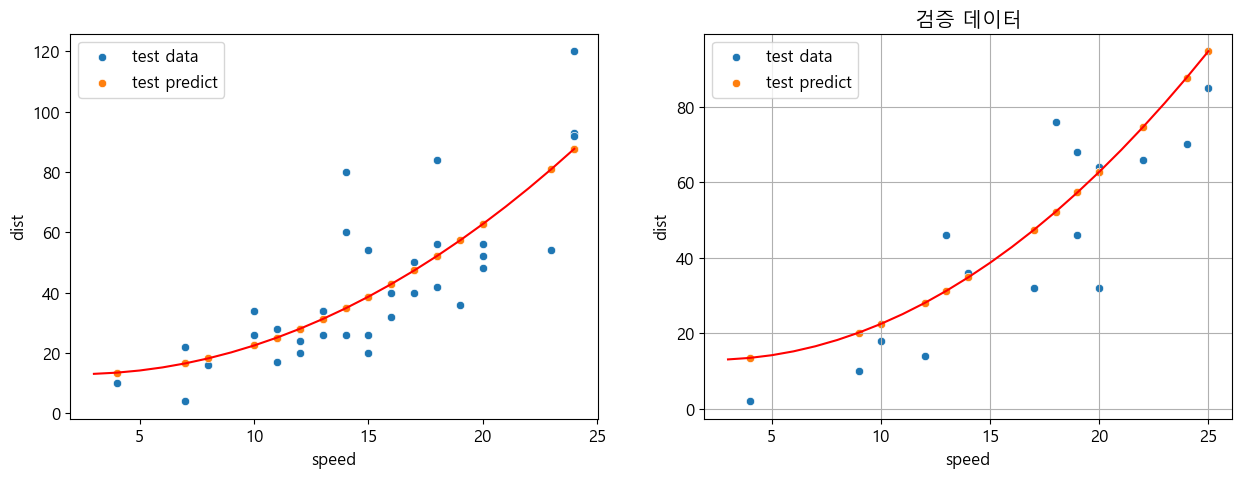

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.scatterplot(x= x_train['speed'], y = y_train['dist'], label = 'test data', ax = ax1)
sb.scatterplot(x= x_train['speed'], y = y_train_pred, label = 'test predict', ax = ax1)
xmin, xmax = ax1.get_xlim()
#xmin, xmax = plt.xlim() subplot이 없을 떄
xrange = np.arange(xmin.round(), xmax.round(), 1)
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax = ax1)


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['speed'], y=y_test['dist'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['speed'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()


## 03. 농어의 크기에 따른 무게 예측


In [37]:
origin = read_excel("fish2.xlsx")
origin.head()


,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
fit = poly.fit_transform(origin[['길이', '높이', '두께']])
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()


,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


In [39]:
def highdegree(data, degree,include_bias):
    poly = PolynomialFeatures(degree= degree, include_bias= include_bias)
    fit = poly.fit_transform(data)
    x = DataFrame(fit, columns = poly.get_feature_names_out())
    return x

In [45]:
x = highdegree(origin[['길이','높이','두께']], 2, False)
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, origin[['무게']], test_size=0.3, random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39, 1), (17, 1))

In [49]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))


계수:  [[ -22.15416845  -65.43857757   94.26363306    0.90271892   -1.0570852
    -0.95260464   39.90859765 -108.99731912   90.16027877]]
절편:  [196.38957982]
훈련 데이터 설명력:  0.9888223174194659
검증 데이터 설명력:  0.9850636569660857


In [50]:
feature_names = x.columns

expr = []
for i, v in enumerate(feature_names):
    expr.append(f"{round(fit.coef_[0][i], 2)} * {v}")
    
expr = " + ".join(expr)
expr = f"y = {expr} + {round(fit.intercept_[0], 2)}"
expr


'y = -22.15 * 길이 + -65.44 * 높이 + 94.26 * 두께 + 0.9 * 길이^2 + -1.06 * 길이 높이 + -0.95 * 길이 두께 + 39.91 * 높이^2 + -109.0 * 높이 두께 + 90.16 * 두께^2 + 196.39'

In [51]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred


array([ 589.79284806, 1034.25655311,  661.66739689,  861.11880067,
        698.62601535,  123.38356513,   84.5123629 , 1013.12224688,
        194.08767269,  245.7466209 ,  135.47990764,  136.91716304,
        127.19743101,   31.03189629,  245.73983767,   77.06212   ,
        167.36059163,  772.86804716,  168.65482736,  220.44719006,
         70.82327828,  124.79555137,  324.1471532 ,  792.34890571,
       1097.60878907,  860.99272288,  121.25977264,  878.04934086,
         53.95178793,  275.52229626,  313.97964269,  121.80304419,
        856.46784725,  126.411878  ,  149.97173246,  810.55424679,
         51.40749586,  200.97696139,   80.35445876])

In [52]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([ 264.65906663,   81.64280493,  969.84407585,  907.62985311,
        133.45457477,  161.72022296,  106.86839286,  201.48037022,
         71.45510233,  155.05684524, 1055.80445442,   97.47093697,
        289.25469077,  668.70140621,  216.90832127,  517.13238208,
        674.89067037])

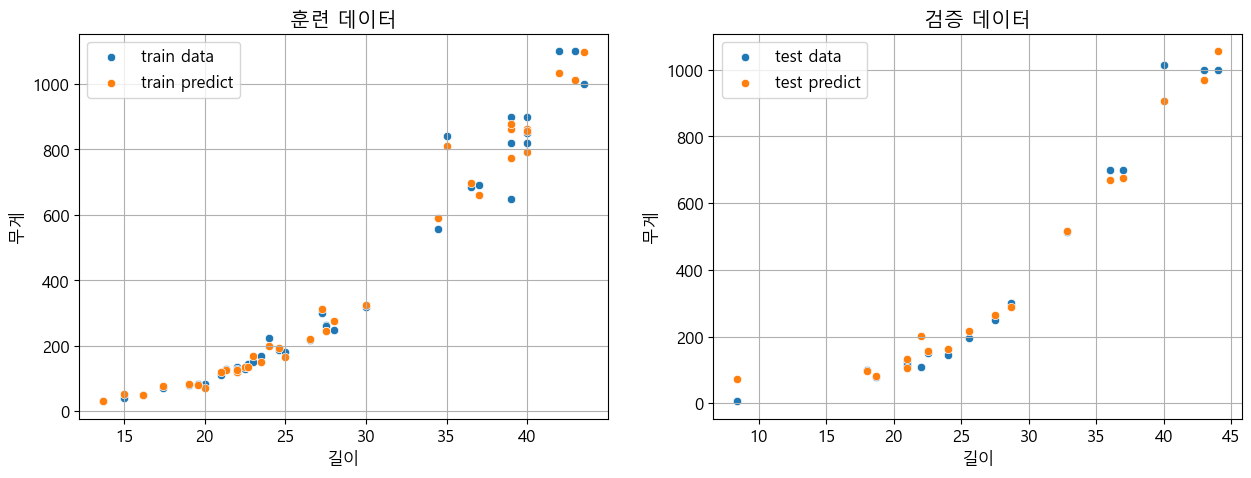

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 길이에 따른 무게에 대한 추세선
seaborn의 regplot 함수는 직선 형태의 추세선만 제공하기 때문에 2차식을 표현하는 추세선은 직접 구현해야 함

In [58]:
x = x_train['길이']
y = y_train['무게']

x에 따라 y값이 변하는 2차 방정식 생성


In [60]:
coeff = np.polyfit(x, y, 2)
coeff


array([  1.10219555, -27.008459  , 191.64552023])

평면좌표 상에서의 가상의 x값 생성


In [61]:
Vtrand = np.linspace(x.min(), x.max(), 100)
Vtrand


array([13.7       , 14.0010101 , 14.3020202 , 14.6030303 , 14.9040404 ,
       15.20505051, 15.50606061, 15.80707071, 16.10808081, 16.40909091,
       16.71010101, 17.01111111, 17.31212121, 17.61313131, 17.91414141,
       18.21515152, 18.51616162, 18.81717172, 19.11818182, 19.41919192,
       19.72020202, 20.02121212, 20.32222222, 20.62323232, 20.92424242,
       21.22525253, 21.52626263, 21.82727273, 22.12828283, 22.42929293,
       22.73030303, 23.03131313, 23.33232323, 23.63333333, 23.93434343,
       24.23535354, 24.53636364, 24.83737374, 25.13838384, 25.43939394,
       25.74040404, 26.04141414, 26.34242424, 26.64343434, 26.94444444,
       27.24545455, 27.54646465, 27.84747475, 28.14848485, 28.44949495,
       28.75050505, 29.05151515, 29.35252525, 29.65353535, 29.95454545,
       30.25555556, 30.55656566, 30.85757576, 31.15858586, 31.45959596,
       31.76060606, 32.06161616, 32.36262626, 32.66363636, 32.96464646,
       33.26565657, 33.56666667, 33.86767677, 34.16868687, 34.46

생성된 x값에 따른 y값 만들기

In [62]:
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
Ttrand


array([  28.50071488,   29.56131527,   30.8216491 ,   32.28171637,
         33.94151709,   35.80105125,   37.86031885,   40.11931989,
         42.57805438,   45.23652231,   48.09472369,   51.1526585 ,
         54.41032676,   57.86772847,   61.52486361,   65.3817322 ,
         69.43833423,   73.69466971,   78.15073862,   82.80654098,
         87.66207679,   92.71734603,   97.97234872,  103.42708485,
        109.08155443,  114.93575745,  120.98969391,  127.24336381,
        133.69676716,  140.34990394,  147.20277418,  154.25537785,
        161.50771497,  168.95978553,  176.61158953,  184.46312698,
        192.51439787,  200.7654022 ,  209.21613998,  217.8666112 ,
        226.71681586,  235.76675396,  245.01642551,  254.4658305 ,
        264.11496893,  273.96384081,  284.01244612,  294.26078489,
        304.70885709,  315.35666274,  326.20420183,  337.25147436,
        348.49848034,  359.94521975,  371.59169262,  383.43789892,
        395.48383867,  407.72951186,  420.17491849,  432.82005

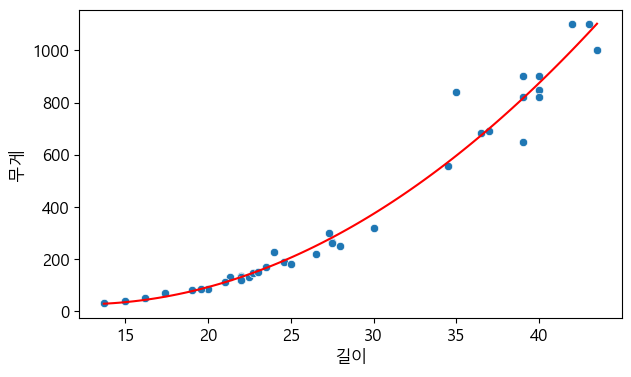

In [63]:
plt.figure(figsize=(7, 4))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])
sb.lineplot(x=Vtrand, y=Ttrand, color='red')
plt.show()
plt.close()

In [64]:
def getTrend(x, y, degree=2, value_count=100):
    #[ a, b, c ] ==> ax^2 + bx + c
    coeff = np.polyfit(x, y, degree)
    
    if type(x) == 'list':
        minx = min(x)
        maxx = max(x)
    else:
        minx = x.min()
        maxx = x.max()
        
    Vtrend = np.linspace(minx, maxx, value_count)
    
    Ttrend = coeff[-1]
    for i in range(0, degree):
        Ttrend += coeff[i] * Vtrend ** (degree - i)
        
    return (Vtrend, Ttrend)   

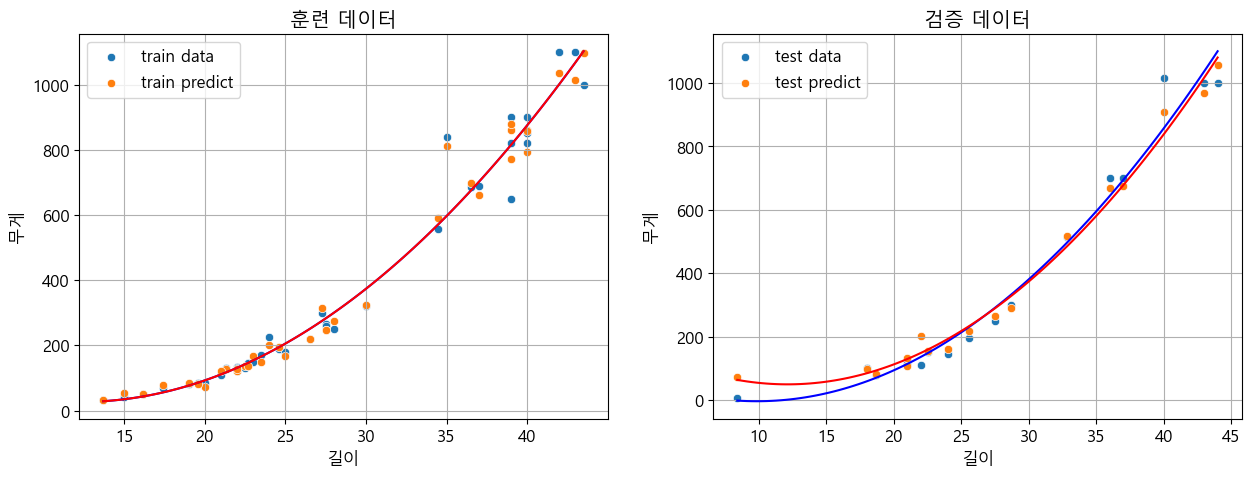

In [69]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 관측치 시각화
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)

# 학습에 사용한 데이터에 추세선
x, y = getTrend(x_train['길이'], y_train['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax1)

# 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

# 추정치에 대한 추세선
x, y = getTrend(x_train['길이'], y_train_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증데이터 시각화
sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)

# 검증데이터의 추세선
x, y = getTrend(x_test['길이'], y_test['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax2)

# 검증데이터에 대한 추정치 시각화
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

# 검증데이터 추정치에 대한 추세선
x, y = getTrend(x_test['길이'], y_test_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()
